# **Clone The Data**

In [2]:
!git clone https://github.com/5hyfilm/2110571-nn-project

fatal: destination path '2110571-nn-project' already exists and is not an empty directory.


# **Install Split Folders**

In [3]:
!pip install split-folders

# **Import Libraries**

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import shutil
import os
from os.path import join

import splitfolders

from garbage_utils import *

# **Hyperparameters**

In [5]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

BATCH_SIZE = 32

LR = 1e-3

EPOCHS = 100

# **Split Data**

In [6]:
mkdir_dir('/content/data_folder')

Directory  /content/data_folder  already exists


In [7]:
splitfolders.ratio('/content/2110571-nn-project/images',
                    output='/content/data_folder',
                    seed=1337,
                    ratio=(0.60, 0.20, 0.20))

Copying files: 2527 files [00:00, 4924.47 files/s]


In [8]:
train_path = '/content/data_folder/train'
val_path = '/content/data_folder/val'
test_path = '/content/data_folder/test'

In [9]:
train_gen = ImageDataGenerator(rescale=1. / 255,
                               rotation_range=0,
                               width_shift_range=0.3,
                               height_shift_range=0.3,
                               horizontal_flip=True,
                               vertical_flip=True,)

val_gen = ImageDataGenerator(rescale=1. / 255)

test_gen = ImageDataGenerator(rescale=1. / 255)

In [10]:
train_datagen = train_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                          directory=train_path,
                                          shuffle=True,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode='categorical')

val_datagen = val_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                          directory=val_path,
                                          shuffle=True,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode='categorical')

test_datagen = test_gen.flow_from_directory(batch_size=1,
                                          directory=test_path,
                                          shuffle=False,
                                          target_size=(IMG_WIDTH, IMG_HEIGHT), #(224,224)
                                          class_mode=None)

Found 1514 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Found 510 images belonging to 6 classes.


In [16]:
NUM_CLASSES = 6

Model

In [17]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 54, 54, 32)       

In [18]:
model.compile(optimizer=Adam(LR), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
model_checkpoint = ModelCheckpoint(filepath='/content/garbage_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [20]:
history = model.fit(train_datagen,
                    validation_data=val_datagen,
                    epochs=EPOCHS,
                    callbacks=[early_stop, model_checkpoint],
                    verbose=1)

Epoch 1/100
48/48 [==============================] - 27s 446ms/step - loss: 1.7409 - accuracy: 0.2299 - val_loss: 1.7607 - val_accuracy: 0.1909
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


48/48 [==============================] - 22s 460ms/step - loss: 1.7254 - accuracy: 0.2219 - val_loss: 1.7289 - val_accuracy: 0.2346
Epoch 3/100
48/48 [==============================] - 21s 437ms/step - loss: 1.7274 - accuracy: 0.2305 - val_loss: 1.7309 - val_accuracy: 0.2346
Epoch 4/100
48/48 [==============================] - 21s 439ms/step - loss: 1.6865 - accuracy: 0.2602 - val_loss: 1.6207 - val_accuracy: 0.3121
Epoch 5/100
48/48 [==============================] - 21s 441ms/step - loss: 1.5902 - accuracy: 0.3157 - val_loss: 1.5648 - val_accuracy: 0.3419
Epoch 6/100
48/48 [==============================] - 22s 448ms/step - loss: 1.5715 - accuracy: 0.3131 - val_loss: 1.5716 - val_accuracy: 0.3340
Epoch 7/100
48/48 [==============================] - 22s 461ms/step - loss: 1.5369 - accuracy: 0.3316 - val_loss: 1.5034 - val_accuracy: 0.3479
Epoch 8/100
48/48 [==============================] - 24s 497ms/step - loss: 1.5341 - accuracy: 0.3382 - val_loss: 1.5727 - val_accuracy: 0.3181
Epoc

# **Graph**

**Accuracy**

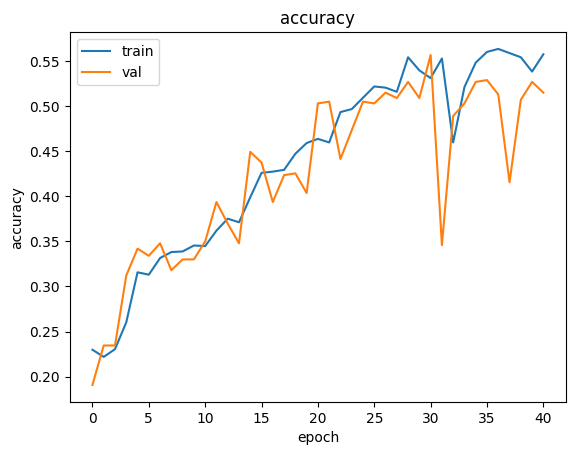

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('accuracy')
plt.show()

**Loss**

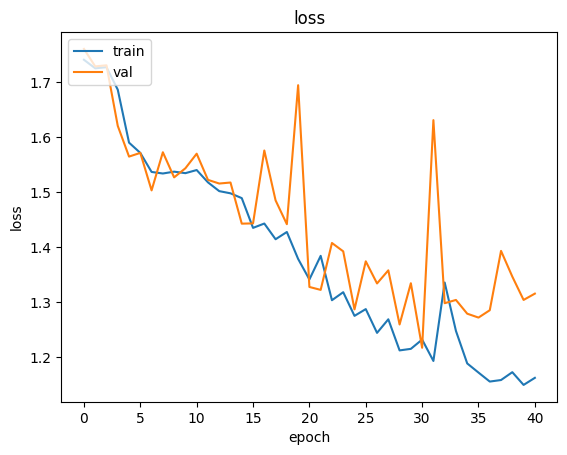

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('loss')
plt.show()

# **Evaluating**

**Confusion Matrix**

In [26]:
test_model = tf.keras.models.load_model('/content/garbage_model.h5')

In [27]:
test_labels = test_datagen.classes
predictions = test_model.predict(test_datagen, steps=test_datagen.samples, verbose=1)

510/510 [==============================] - 4s 5ms/step


In [29]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['paper', 'cardboard', 'trash', 'metal', 'glass', 'plastic']

Confusion matrix, without normalization
[[59  9  1  8  5  0]
 [ 3 44 11 23 20  0]
 [ 6  9 19 41  7  0]
 [ 1  9  3 99  8  0]
 [ 3  7  6 30 51  0]
 [ 5  8  2 12  1  0]]


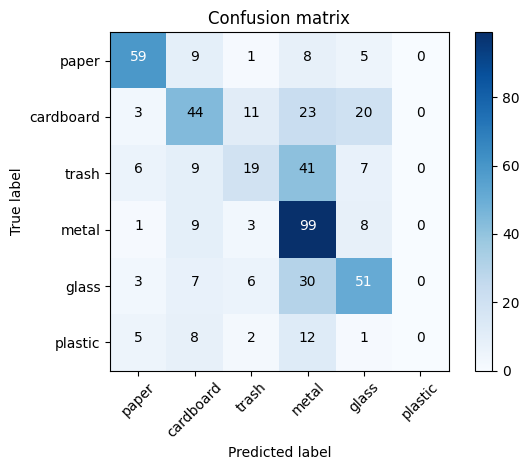

In [30]:
plot_confusion_matrix(cm, cm_plot_labels)

In [31]:
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, y_pred))
print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=cm_plot_labels))


Confusion Matrix
[[59  9  1  8  5  0]
 [ 3 44 11 23 20  0]
 [ 6  9 19 41  7  0]
 [ 1  9  3 99  8  0]
 [ 3  7  6 30 51  0]
 [ 5  8  2 12  1  0]]
Classification Report
              precision    recall  f1-score   support

       paper       0.77      0.72      0.74        82
   cardboard       0.51      0.44      0.47       101
       trash       0.45      0.23      0.31        82
       metal       0.46      0.82      0.59       120
       glass       0.55      0.53      0.54        97
     plastic       0.00      0.00      0.00        28

    accuracy                           0.53       510
   macro avg       0.46      0.46      0.44       510
weighted avg       0.51      0.53      0.50       510



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
